# **Convolution for Classification of the Horses from the Humans**

## **Abstract**

Aim of the notebook is to classify the humans and horses by using the neural network and the convolution using TensorFlow.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [ ]:
pip install wget

The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

There is no need to explicitly label the images as horses or humans. It is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. 

In [1]:
 import os

In [2]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/validation-horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('validation-horse-or-human/validation-humans')

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

1.15.0


Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*  - end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [24]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(2, activation='softmax')
])

The model.summary() method call prints a summary of the NN 

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='mse',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### **Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [64]:
CLASS_NAMES = ['Horse','Human']

In [65]:
CLASS_NAMES[0]

'Horse'

In [30]:
[label_batch[1][0]==1]

[True]

In [31]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
     # plt.title(CLASS_NAMES[label_batch[n]==1].title())
      plt.axis('off')

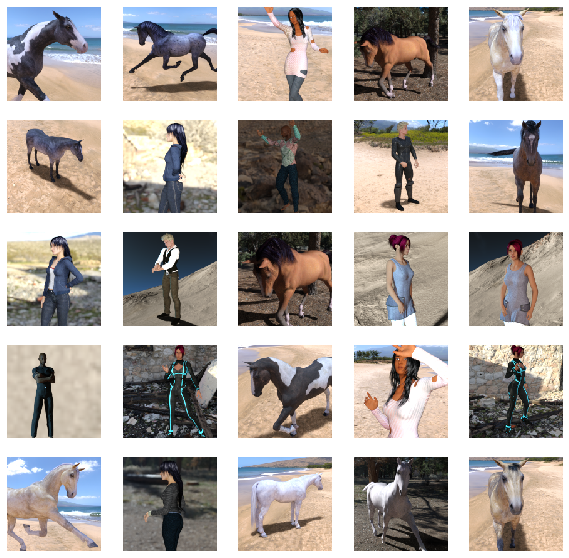

In [32]:
import matplotlib.pyplot as plt

image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

### **Training**


In [36]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 0.0031 - acc: 0.9967 - val_loss: 0.1182 - val_acc: 0.8672
Epoch 2/15
8/8 [==============================] - 8s 948ms/step - loss: 0.0032 - acc: 0.9978 - val_loss: 0.2442 - val_acc: 0.7344
Epoch 3/15
8/8 [==============================] - 7s 902ms/step - loss: 0.0434 - acc: 0.9399 - val_loss: 0.1461 - val_acc: 0.8477
Epoch 4/15
8/8 [==============================] - 7s 883ms/step - loss: 0.0019 - acc: 0.9989 - val_loss: 0.1271 - val_acc: 0.8672
Epoch 5/15
8/8 [==============================] - 7s 872ms/step - loss: 3.1328e-04 - acc: 1.0000 - val_loss: 0.1302 - val_acc: 0.8594
Epoch 6/15
8/8 [==============================] - 7s 892ms/step - loss: 0.0849 - acc: 0.9177 - val_loss: 0.2946 - val_acc: 0.6992
Epoch 7/15
8/8 [==============================] - 7s 882ms/step - loss: 0.0382 - acc: 0.9499 - val_loss: 0.1884 - val_acc: 0.8086
Epoch 8/15
8/8 [==============================] - 8s 1s/step - loss: 0.0303 - acc: 0.9629

In [37]:
val, label_batch = next(validation_generator)

In [38]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np
# select a set of background examples to take an expectation over
background = image_batch[1:10]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(val[1:10])

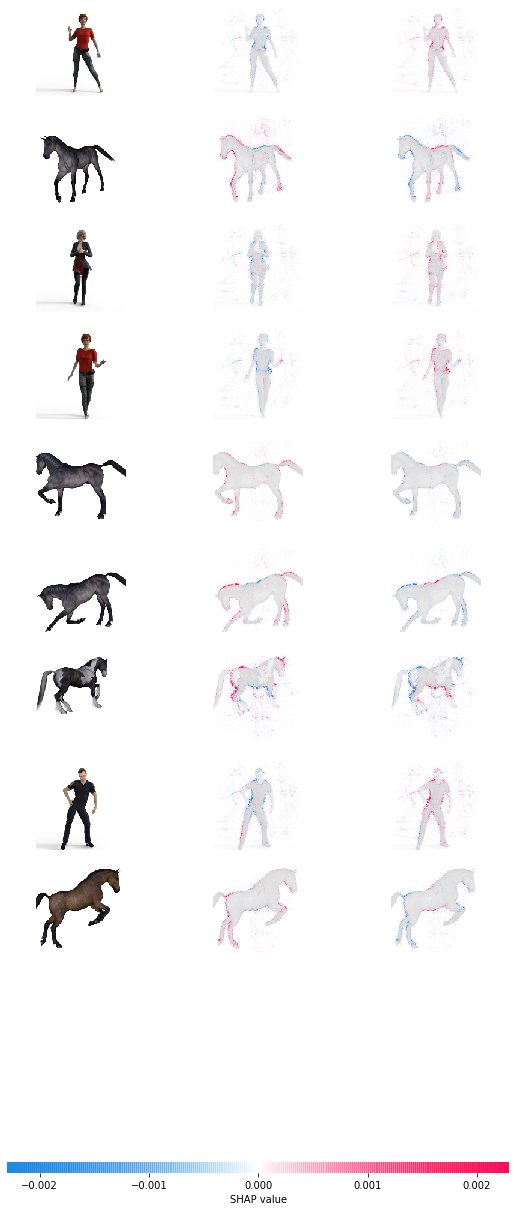

In [39]:
# plot the feature attributions
shap.image_plot(shap_values, val[1:10])

Red pixels increase the model's output while blue pixels decrease the output. The input images are shown on the left, and as nearly transparent grayscale backings behind each of the explanations. The sum of the SHAP values equals the difference between the expected model output (averaged over the background dataset) and the current model output. Note that for the 'zero' image the blank middle is important, while for the 'four' image the lack of a connection on top makes it a four instead of a nine

In [69]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

# load pre-trained model and choose two images to explain
#model = VGG16(weights='imagenet', include_top=True)
#X,y = shap.datasets.imagenet50()
to_explain = val[1:4]

In [70]:
X, y = next(train_generator)


In [71]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(2):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
     # plt.title(CLASS_NAMES[label_batch[n]==1].title())
      plt.axis('off')

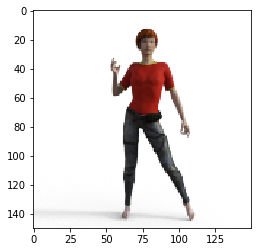

In [72]:
#show_batch(to_explain, label_batch)
plt.imshow(val[1])


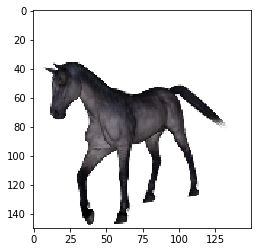

In [73]:
plt.imshow(val[2])

In [74]:
map2layer(X, 4)

array([[[[23.911818, 35.81657 ,  0.      , ..., 37.522655, 28.153652,
           0.      ],
         [23.904415, 35.815655,  0.      , ..., 37.51856 , 28.170578,
           0.      ],
         [23.875208, 35.804394,  0.      , ..., 37.51048 , 28.180504,
           0.      ],
         ...,
         [23.770721, 35.685772,  0.      , ..., 37.380135, 28.097311,
           0.      ],
         [23.76519 , 35.68389 ,  0.      , ..., 37.386097, 28.108572,
           0.      ],
         [23.757458, 35.67284 ,  0.      , ..., 37.380745, 28.106424,
           0.      ]],

        [[23.91213 , 35.80296 ,  0.      , ..., 37.524204, 28.149096,
           0.      ],
         [23.90918 , 35.804214,  0.      , ..., 37.522884, 28.155514,
           0.      ],
         [23.886866, 35.817997,  0.      , ..., 37.514713, 28.177212,
           0.      ],
         ...,
         [23.813185, 35.719387,  0.      , ..., 37.406902, 28.112017,
           0.      ],
         [23.815615, 35.726765,  0.      , ..., 37

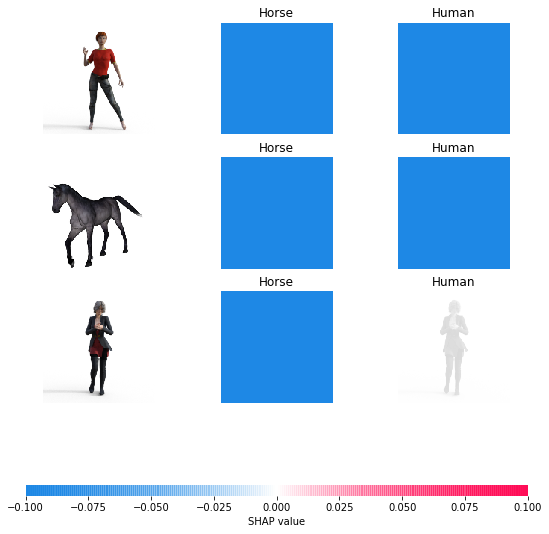

In [83]:


# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[3].input, model.layers[-1].output),
    map2layer(X, 3),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 3), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: CLASS_NAMES[x])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

### **Running the Model**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

In [ ]:

%load_ext autoreload
%autoreload 2

In [ ]:

import tcav.activation_generator as act_gen
import tcav.cav as cav
import tcav.model  as model
import tcav.tcav as tcav
import tcav.utils as utils
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
import os 
import tensorflow as tf

Conclusion

It was able to predict other image which was not seen by the model.


### **Refrence** 

1. https://www.coursera.org/learn/introduction-tensorflow/home/welcome
2. https://www.tensorflow.org/

Copyright 2020 Abhishek Gargha Maheshwarappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.